In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from matplotlib import rcParams
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('data/waterparams_lagunalake.csv')

In [3]:
df.head()

,id,Station,Month,BOD,DO,pH,Phosphate,Ammonia,Nitrate,Year
0,1,Stn. I (Central West bay),1,1.0,7.9,8.4,0.087,0.001,0.223,2017
1,2,Stn. II (East Bay),1,1.0,7.7,8.0,0.084,0.001,0.343,2017
2,3,Stn. IV (Central Bay),1,1.0,8.1,8.3,0.072,0.001,0.149,2017
3,4,Stn. V ( Nothern West Bay),1,1.0,8.5,8.1,0.181,0.001,0.344,2017
4,5,Stn. VIII (South Bay),1,1.0,7.6,8.0,0.101,0.001,0.335,2017


In [4]:
df.describe()

,id,Month,BOD,DO,pH,Phosphate,Ammonia,Nitrate,Year
count,557.000000,557.000000,539.000000,557.000000,557.000000,557.000000,539.000000,503.000000,557.000000
mean,279.000000,6.448833,2.666419,8.023878,8.396948,0.122050,0.057494,0.175185,2019.271095
std,160.936323,3.477521,1.475791,1.276864,0.525680,0.085645,0.109189,0.341636,1.697472
min,1.000000,1.000000,0.500000,4.500000,2.700000,0.008000,0.001000,0.001000,2017.000000
25%,140.000000,3.000000,2.000000,7.300000,8.100000,0.066000,0.012000,0.050000,2018.000000
50%,279.000000,6.000000,2.000000,7.800000,8.300000,0.102000,0.030000,0.050000,2019.000000
75%,418.000000,9.000000,3.000000,8.400000,8.700000,0.153000,0.057500,0.221500,2021.000000
max,557.000000,12.000000,10.000000,17.200000,9.700000,0.805000,1.540000,4.434000,2022.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         557 non-null    int64  
 1   Station    557 non-null    object 
 2   Month      557 non-null    int64  
 3   BOD        539 non-null    float64
 4   DO         557 non-null    float64
 5   pH         557 non-null    float64
 6   Phosphate  557 non-null    float64
 7   Ammonia    539 non-null    float64
 8   Nitrate    503 non-null    float64
 9   Year       557 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 43.6+ KB


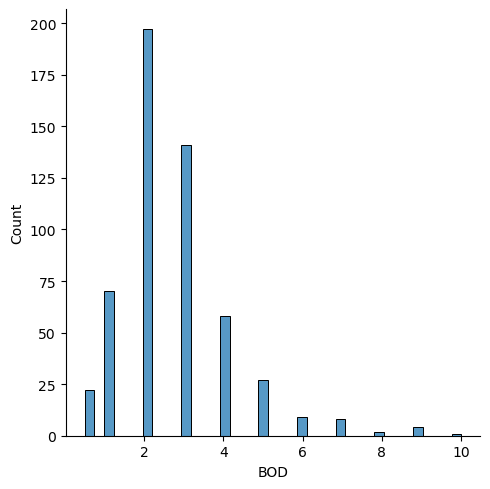

In [6]:
sns.displot(df['BOD'])

In [7]:
df.isnull().sum()

id            0
Station       0
Month         0
BOD          18
DO            0
pH            0
Phosphate     0
Ammonia      18
Nitrate      54
Year          0
dtype: int64

In [8]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

In [9]:
#data['DO']=pd.to_numeric(data['DO'],errors='coerce')

In [10]:
df['BOD'] = df['BOD'].fillna(df['BOD'].mean())
df['DO'] = df['DO'].fillna(df['DO'].mean())
df['pH'] = df['pH'].fillna(df['pH'].mean())
df['Phosphate'] = df['Phosphate'].fillna(df['Phosphate'].mean())
df['Ammonia'] = df['Ammonia'].fillna(df['Ammonia'].mean())
df['Nitrate'] = df['Nitrate'].fillna(df['Nitrate'].mean())
df.isnull().sum()

id           0
Station      0
Month        0
BOD          0
DO           0
pH           0
Phosphate    0
Ammonia      0
Nitrate      0
Year         0
dtype: int64

In [11]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df, x='Year', y='pH')
ax.set_title('pH per year')

Text(0.5, 1.0, 'pH per year')

In [12]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df, x='Year', y='BOD')
ax.set_title('BOD per year')

Text(0.5, 1.0, 'BOD per year')

In [13]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df, x='Year', y='DO')
ax.set_title('Dissolve oxygen per year')

Text(0.5, 1.0, 'Dissolve oxygen per year')

In [14]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df, x='Year', y='Phosphate')
ax.set_title('Phosphate per year')

Text(0.5, 1.0, 'Phosphate per year')

In [15]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df, x='Year', y='Ammonia')
ax.set_title('Ammonia per year')

Text(0.5, 1.0, 'Ammonia per year')

In [16]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df, x='Year', y='Nitrate')
ax.set_title('Nitrate per year')

Text(0.5, 1.0, 'Nitrate per year')

In [17]:
plt.rcParams['figure.figsize'] = [12,10]
df1.hist()
plt.show()

NameError: name 'df1' is not defined

In [ ]:
#df1.drop(['id','Station','Month','Year'], axis=1, inplace=True)

plt.figure(figsize=(8,6.5))
plt.title("Correlation Graph of all features")
sns.heatmap(df1.corr(),annot=True, cmap='coolwarm')
#sns.heatmap(df1.corr(),annot=True, cmap='terrain')
plt.show()

(Q-Value) Water Quality Index Calculation 

Q-Value of pH

      WQI = ∑ qi × wi / ∑ wi

 wi - Unit weight of ith parameter

 qi - Quality estimate scale of each parameter, it is calculated with the formula - 
     
     qi = 100 × ( Vi − VIdeal / Si − VIdeal )

 Vi - Measured value of ith parameter

 Videal - Ideal value of ith parameter

 Si - Standard value recommended for ith parameter
 
 wi is calculated by the formula -

       wi = K / Si

  Here K is proportionality constant which is -

        K = 1 / ∑ Si

In [18]:
#Assigned standard value based from WHO
sv_bod = 6
sv_do = 5
sv_pH = 7.5
sv_phosphates = .1
sv_ammonia = .3
sv_nitrate = 45

Equation for proportionalconstant :
K = 1 / ∑ (Si)

In [19]:
K = 1/((1/sv_bod) + (1/sv_do) + (1/sv_pH) + (1/sv_phosphates) + (1/sv_ammonia) + (1/sv_nitrate))

To calculate the unit wait (Wi) for each water parameter:
    wi = K / Si

In [20]:
df['WiBOD'] = K/sv_bod
df['WiDO'] = K/sv_bod
df['WipH'] = K/sv_pH
df['WiPhosphate'] = K/sv_phosphates
df['WiAmmonia'] = K/sv_ammonia
df['WiNitrate'] = K/sv_nitrate

Quality estimate scale of each parameter

   qi = 100 × ( Vi − VIdeal / Si − VIdeal )
     Vi - Measured value of ith parameter
     Videal - Ideal value of ith parameter
     Si - Standard value recommended for ith parameter


In [21]:
qi_bod = 100 * ((df['BOD'] - 0)/(sv_bod - 0))
qi_do = 100 * ((df['DO'] - 14.6)/(sv_do - 14.6))
qi_ph = 100 * ((df['pH'] - 7)/(sv_pH - 7))
qi_phosphates = 100 * ((df['Phosphate'] - 0)/(sv_phosphates - 0))
qi_ammonia = 100 * ((df['Ammonia'] - 0)/(sv_ammonia - 0))
qi_nitrate = 100 * ((df['Nitrate'] - 0)/(sv_nitrate - 0))

In [22]:
# quality scale of each parameter multiply by its unit weight [qi x wi]
xbod = qi_bod * df.WiBOD
xdo = qi_do * df.WiDO
xph = qi_ph * df.WipH
xphosphates = qi_phosphates * df.WiPhosphate
xammonia = qi_ammonia * df.WiAmmonia
xnitrate = qi_nitrate * df.WiNitrate

    #∑ qi × wi
sum_qiwi = xbod + xdo + xph + xphosphates + xammonia + xnitrate;

    #∑ wi
sum_wi = df.WiBOD + df.WiDO + df.WipH + df.WiPhosphate + df.WiAmmonia + df.WiNitrate


WAWQI final computation

     WQI = ∑ qi × wi / ∑ wi

In [23]:
df['wqi'] = round(sum_qiwi/sum_wi,2)
df['wqc']=df['wqi'].apply(lambda x:('Excellent' if (25>=x>=0)  
                                 else('Good' if  (50>=x>=26) 
                                      else('Poor' if (75>=x>=51)
                                          else('Very Poor' if (100>=x>=76) 
                                              else 'Unsuitable')))))
                                       
df

,id,Station,Month,BOD,DO,pH,Phosphate,Ammonia,Nitrate,Year,WiBOD,WiDO,WipH,WiPhosphate,WiAmmonia,WiNitrate,wqi,wqc
0,1,Stn. I (Central West bay),1,1.0,7.9,8.4,0.087,0.001,0.223,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,66.77,Poor
1,2,Stn. II (East Bay),1,1.0,7.7,8.0,0.084,0.001,0.343,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,63.85,Poor
2,3,Stn. IV (Central Bay),1,1.0,8.1,8.3,0.072,0.001,0.149,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,55.70,Poor
3,4,Stn. V ( Nothern West Bay),1,1.0,8.5,8.1,0.181,0.001,0.344,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,134.12,Unsuitable
4,5,Stn. VIII (South Bay),1,1.0,7.6,8.0,0.101,0.001,0.335,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,76.16,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,553,Stn. VIII (South Bay),9,5.0,9.1,6.8,0.150,0.040,0.010,2022,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,113.05,Unsuitable
553,554,Stn. XV (San Pedro),9,3.0,7.6,7.9,0.230,0.100,0.120,2022,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,177.66,Unsuitable
554,555,Stn. XVI (Sta. Rosa),9,3.0,7.7,8.0,0.150,0.030,0.050,2022,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,114.33,Unsuitable
555,556,Stn. XVII (Sanctuary),9,4.0,9.2,8.7,0.050,0.040,0.050,2022,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,44.15,Good


Calculation of OVerall WQI for each year from 2017 to 2022

In [24]:
average = df.groupby('Year')['wqi'].mean()
wqimean = average.apply(lambda x:('Excellent' if (25>=x>=0)  
                                 else('Good' if  (50>=x>=26) 
                                      else('Poor' if (75>=x>=51)
                                          else('Very Poor' if (100>=x>=76) 
                                              else 'Unsuitable')))))
finalwqi = f'{average} {wqimean}'
print(finalwqi)

Year
2017    108.460185
2018    102.638611
2019     90.318981
2020     47.134603
2021     82.863469
2022    144.085833
Name: wqi, dtype: float64 Year
2017    Unsuitable
2018    Unsuitable
2019     Very Poor
2020          Good
2021     Very Poor
2022    Unsuitable
Name: wqi, dtype: object


In [25]:
xx = round(df.groupby(['Year','Station'])['wqi'].mean(),2)

xxx = xx.apply(lambda x:('Excellent' if (25>=x>=0)  
                                 else('Good' if  (50>=x>=26) 
                                      else('Poor' if (75>=x>=51)
                                          else('Very Poor' if (100>=x>=76) 
                                              else 'Unsuitable')))))
#x4 = f'{xx} {xxx}'
x5 = f'{xx}'
print(x5)

Year  Station                   
2017  Stn. I (Central West bay)     138.32
      Stn. II (East Bay)             77.74
      Stn. IV (Central Bay)         122.44
      Stn. V ( Nothern West Bay)    170.59
      Stn. VIII (South Bay)          87.23
      Stn. XV (San Pedro)           101.52
      Stn. XVI (Sta. Rosa)          108.81
      Stn. XVII (Sanctuary)          97.63
      Stn. XVIII (Pagsanjan)         71.87
2018  Stn. I (Central West bay)     121.31
      Stn. II (East Bay)             81.77
      Stn. IV (Central Bay)         113.64
      Stn. V ( Nothern West Bay)    121.05
      Stn. VIII (South Bay)         148.44
      Stn. XV (San Pedro)            92.91
      Stn. XVI (Sta. Rosa)           92.91
      Stn. XVII (Sanctuary)          95.61
      Stn. XVIII (Pagsanjan)         56.09
2019  Stn. I (Central West bay)     119.22
      Stn. II (East Bay)             71.09
      Stn. IV (Central Bay)         106.24
      Stn. V ( Nothern West Bay)    140.65
      Stn. VIII (Sout

C:\Users\StockOverflow\AppData\Local\Temp\ipykernel_9360\3953909284.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


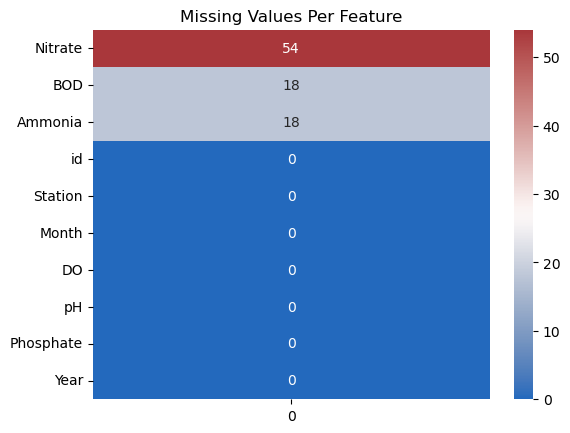

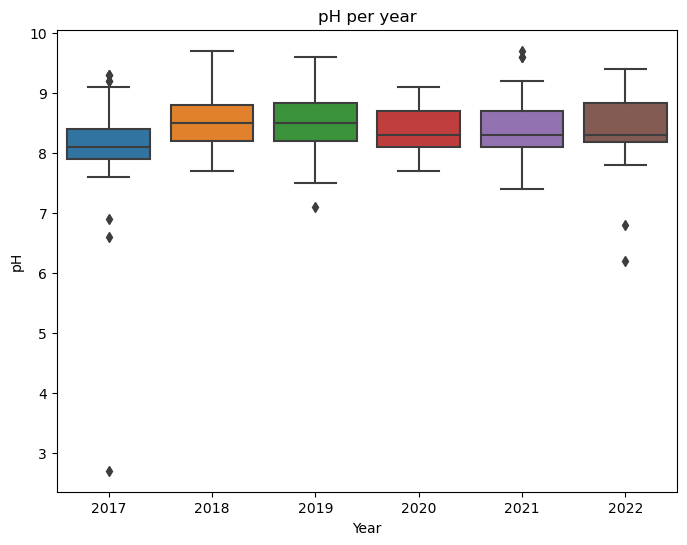

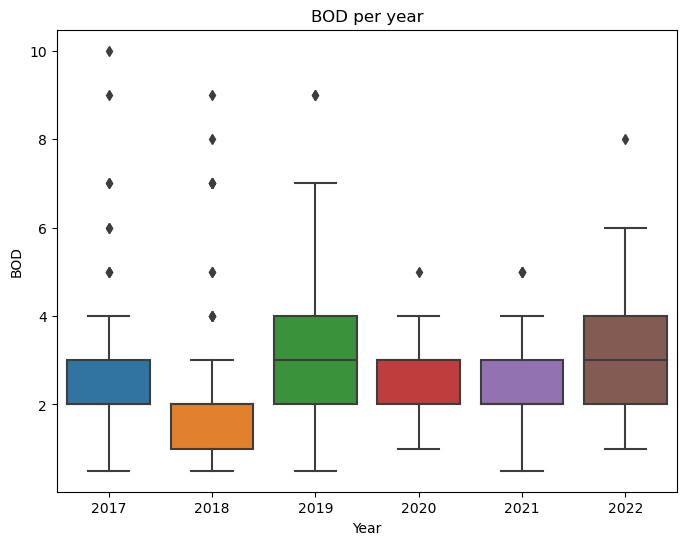

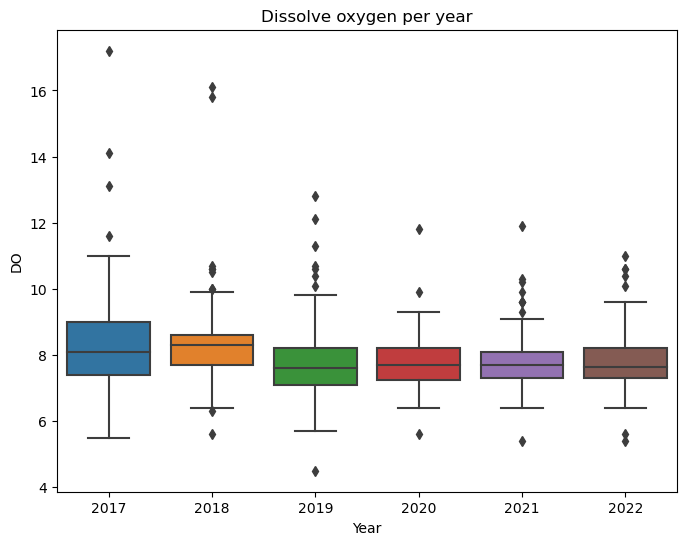

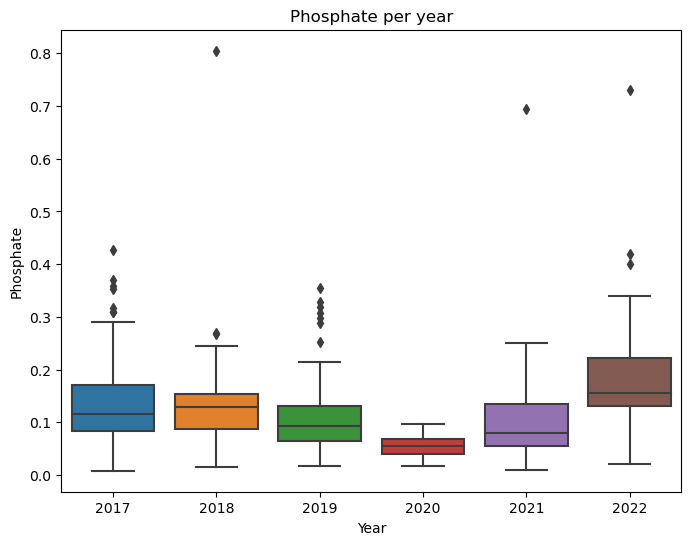

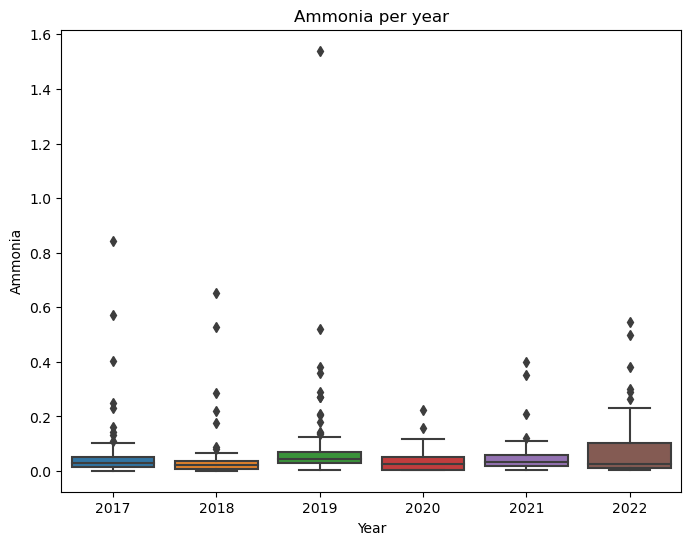

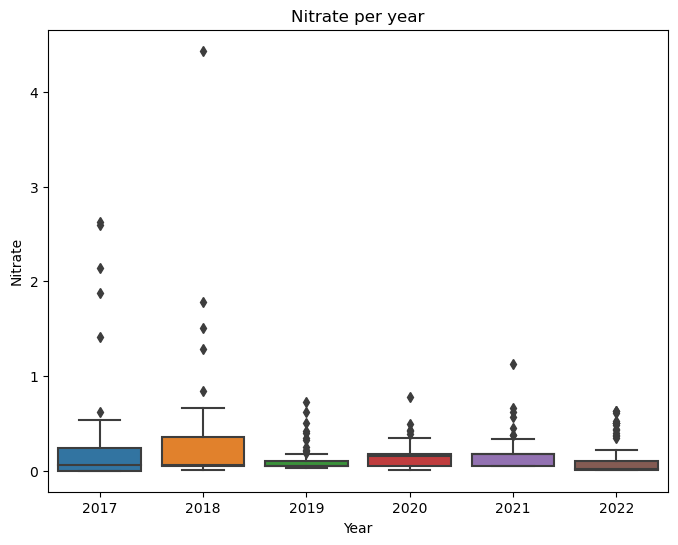

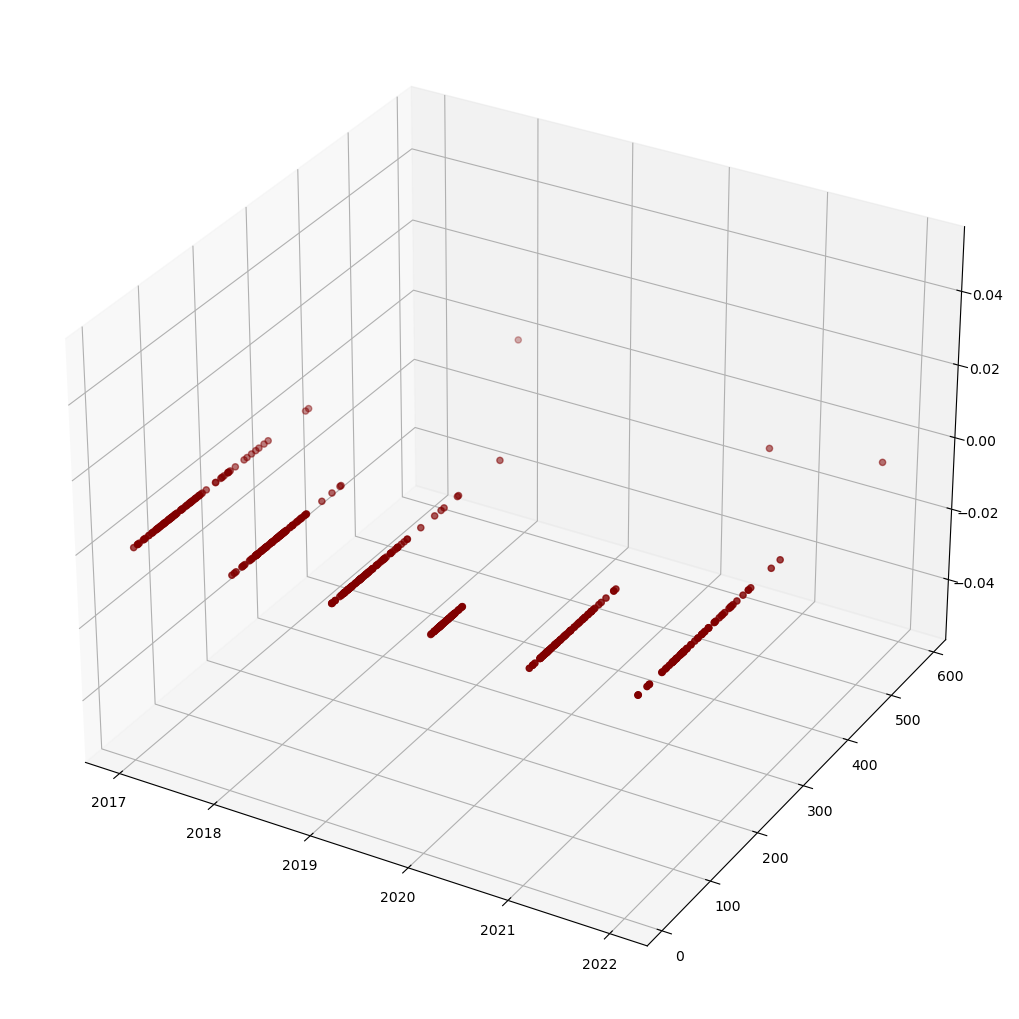

,id,Station,Month,BOD,DO,pH,Phosphate,Ammonia,Nitrate,Year,WiBOD,WiDO,WipH,WiPhosphate,WiAmmonia,WiNitrate,wqi,wqc
0,1,Stn. I (Central West bay),1,1.0,7.9,8.4,0.087,0.001,0.223,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,66.77,Poor
1,2,Stn. II (East Bay),1,1.0,7.7,8.0,0.084,0.001,0.343,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,63.85,Poor
2,3,Stn. IV (Central Bay),1,1.0,8.1,8.3,0.072,0.001,0.149,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,55.70,Poor
3,4,Stn. V ( Nothern West Bay),1,1.0,8.5,8.1,0.181,0.001,0.344,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,134.12,Unsuitable
4,5,Stn. VIII (South Bay),1,1.0,7.6,8.0,0.101,0.001,0.335,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,76.16,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,553,Stn. VIII (South Bay),9,5.0,9.1,6.8,0.150,0.040,0.010,2022,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,113.05,Unsuitable
553,554,Stn. XV (San Pedro),9,3.0,7.6,7.9,0.230,0.100,0.120,2022,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,177.66,Unsuitable
554,555,Stn. XVI (Sta. Rosa),9,3.0,7.7,8.0,0.150,0.030,0.050,2022,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,114.33,Unsuitable
555,556,Stn. XVII (Sanctuary),9,4.0,9.2,8.7,0.050,0.040,0.050,2022,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,44.15,Good


In [26]:
#visualizing the filttered data

year=df['Year'].values
AQI=df['wqi'].values
df['wqi']=pd.to_numeric(df['wqi'],errors='coerce')
df['Year']=pd.to_numeric(df['Year'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='maroon')
plt.show()
df

In [27]:
plt.figure(figsize = (20,4))
plt.subplot(1,5,1)
#sns.countplot('Year', hue='wqc', data=df)
sns.countplot('Year', hue='wqc', data=df)

C:\Users\StockOverflow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

In [28]:
df = df[np.isfinite(df['wqi'])]
df.head()

,id,Station,Month,BOD,DO,pH,Phosphate,Ammonia,Nitrate,Year,WiBOD,WiDO,WipH,WiPhosphate,WiAmmonia,WiNitrate,wqi,wqc
0,1,Stn. I (Central West bay),1,1.0,7.9,8.4,0.087,0.001,0.223,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,66.77,Poor
1,2,Stn. II (East Bay),1,1.0,7.7,8.0,0.084,0.001,0.343,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,63.85,Poor
2,3,Stn. IV (Central Bay),1,1.0,8.1,8.3,0.072,0.001,0.149,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,55.70,Poor
3,4,Stn. V ( Nothern West Bay),1,1.0,8.5,8.1,0.181,0.001,0.344,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,134.12,Unsuitable
4,5,Stn. VIII (South Bay),1,1.0,7.6,8.0,0.101,0.001,0.335,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,76.16,Very Poor


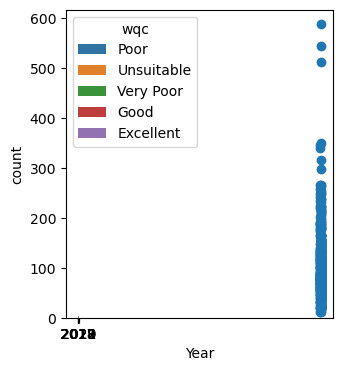

In [29]:
#scatter plot of data points
cols =['Year']
y = df['wqi']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [30]:
df.drop(['id','Station','Month'], axis=1, inplace=True)
df.head()

,BOD,DO,pH,Phosphate,Ammonia,Nitrate,Year,WiBOD,WiDO,WipH,WiPhosphate,WiAmmonia,WiNitrate,wqi,wqc
0,1.0,7.9,8.4,0.087,0.001,0.223,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,66.77,Poor
1,1.0,7.7,8.0,0.084,0.001,0.343,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,63.85,Poor
2,1.0,8.1,8.3,0.072,0.001,0.149,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,55.70,Poor
3,1.0,8.5,8.1,0.181,0.001,0.344,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,134.12,Unsuitable
4,1.0,7.6,8.0,0.101,0.001,0.335,2017,0.012029,0.012029,0.009623,0.721732,0.240577,0.001604,76.16,Very Poor


In [31]:
X = df.iloc[:,0:6].values #BOD to Nitrate col

In [32]:
X.shape

(557, 6)

In [33]:
y = df.iloc[:,-1:].values
#y1 = df['remarks'].values
#y = df['wqc']

In [34]:
print(X)

[[1.00e+00 7.90e+00 8.40e+00 8.70e-02 1.00e-03 2.23e-01]
 [1.00e+00 7.70e+00 8.00e+00 8.40e-02 1.00e-03 3.43e-01]
 [1.00e+00 8.10e+00 8.30e+00 7.20e-02 1.00e-03 1.49e-01]
 ...
 [3.00e+00 7.70e+00 8.00e+00 1.50e-01 3.00e-02 5.00e-02]
 [4.00e+00 9.20e+00 8.70e+00 5.00e-02 4.00e-02 5.00e-02]
 [3.00e+00 9.40e+00 8.30e+00 1.20e-01 6.00e-02 5.00e-02]]


In [35]:
y.shape

(557, 1)

In [36]:
print(y)

[['Poor']
 ['Poor']
 ['Poor']
 ['Unsuitable']
 ['Very Poor']
 ['Very Poor']
 ['Poor']
 ['Good']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Very Poor']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Poor']
 ['Good']
 ['Poor']
 ['Very Poor']
 ['Poor']
 ['Poor']
 ['Poor']
 ['Poor']
 ['Good']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Good']
 ['Poor']
 ['Unsuitable']
 ['Very Poor']
 ['Excellent']
 ['Poor']
 ['Very Poor']
 ['Poor']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Poor']
 ['Unsuitable']
 ['Unsuitable']
 ['Very Poor']
 ['Unsuitable']
 ['Very Poor']
 ['Unsuitable']
 ['Unsuitable']
 ['Unsuitable']
 ['Good']
 ['Very Poor']
 ['Very Poor']
 ['Unsuitable']
 ['Unsuitable']
 ['Poor']
 ['Very Poor']
 ['Very Poor']
 ['Poor']
 ['Very Poor']
 ['Very Poor']
 ['Poor']
 ['Very Poor']
 ['Good']
 [

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [38]:
X_train.shape, X_test.shape

((445, 6), (112, 6))

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.14893603, -0.09710451,  0.00581115, -0.40961678, -0.52644692,
         0.14742715],
       [-1.14893603, -0.25387904, -0.75579183, -0.44467644, -0.52644692,
         0.51742018],
       [-1.14893603,  0.05967002, -0.18458959, -0.58491506, -0.52644692,
        -0.08073523],
       ...,
       [ 0.22999187, -0.25387904, -0.75579183,  0.32663597, -0.25620417,
        -0.38597948],
       [ 0.91945582,  0.92192993,  0.5770134 , -0.8420192 , -0.16301701,
        -0.38597948],
       [ 0.22999187,  1.07870445, -0.18458959, -0.02396058,  0.0233573 ,
        -0.38597948]])

# Classification

RandomForest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

#creating obj
model_rf = RandomForestClassifier()

In [41]:
#Training Model of RF
model_rf.fit(X_train, y_train)

C:\Users\StockOverflow\AppData\Local\Temp\ipykernel_9360\3858345638.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


RandomForestClassifier()

In [42]:
rf_score = model_rf.score(X_train,y_train)
print("RandomForest Training Score : ", rf_score)

RandomForest Training Score :  1.0


In [43]:
rfcv_score = cross_val_score(model_rf, X_train, y_train, cv=6)
print("CV Mean Score : ", rfcv_score.mean())

C:\Users\StockOverflow\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\StockOverflow\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\StockOverflow\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\StockOverflow\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConvers

CV Mean Score :  0.9236036036036036


In [44]:
#making prediction using RF
pred_rf = model_rf.predict(X_test)

In [45]:
accuracy_score_rf = accuracy_score(y_test, pred_rf)*100
print(f"Accuracy Score = {accuracy_score_rf}")

Accuracy Score = 91.96428571428571


In [46]:
confusion_matrix_rf = confusion_matrix(y_test, pred_rf)
confusion_matrix_rf

array([[ 4,  0,  0,  0,  0],
       [ 0, 21,  1,  0,  0],
       [ 0,  1, 25,  0,  0],
       [ 0,  0,  3, 39,  2],
       [ 0,  0,  2,  0, 14]], dtype=int64)

In [47]:
classification_report_rf = classification_report(y_test,pred_rf)
print(f"Random Forest Classification Report = \n {classification_report_rf}")
sns.set(rc={'figure.figsize': (8, 5)})
sns.heatmap(confusion_matrix(y_test, pred_rf), annot=True, fmt='.2f')

Random Forest Classification Report = 
               precision    recall  f1-score   support

   Excellent       1.00      1.00      1.00         4
        Good       0.95      0.95      0.95        22
        Poor       0.81      0.96      0.88        26
  Unsuitable       1.00      0.89      0.94        44
   Very Poor       0.88      0.88      0.88        16

    accuracy                           0.92       112
   macro avg       0.93      0.94      0.93       112
weighted avg       0.93      0.92      0.92       112



<AxesSubplot:>

Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=6, splitter='best')


In [49]:
model_dt.fit(X_train,y_train)


DecisionTreeClassifier(min_samples_split=6)

In [50]:
dt_score = model_dt.score(X_train,y_train)
print("Decision Tree Training Score : ", dt_score)

Decision Tree Training Score :  0.9842696629213483


In [51]:
dtcv_score = cross_val_score(model_dt, X_train, y_train, cv=6)
print("CV Mean Score : ", dtcv_score.mean())

CV Mean Score :  0.9055855855855856


In [52]:
pred_dt = model_dt.predict(X_test)

In [53]:
accuracy_score_dt = accuracy_score(y_test, pred_dt)*100
print(f"Accuracy Score = {accuracy_score_dt}")

Accuracy Score = 92.85714285714286


In [54]:
confusion_matrix_dt = confusion_matrix(y_test, pred_dt)
confusion_matrix_dt

array([[ 4,  0,  0,  0,  0],
       [ 0, 19,  0,  3,  0],
       [ 0,  0, 25,  0,  1],
       [ 0,  1,  1, 40,  2],
       [ 0,  0,  0,  0, 16]], dtype=int64)

In [55]:
classification_report_dt = classification_report(y_test,pred_dt)
print(f"Decision Tree Classification Report = \n {classification_report_dt}")
sns.set(rc={'figure.figsize': (8, 5)})
sns.heatmap(confusion_matrix(y_test, pred_dt), annot=True, fmt='.2f')

Decision Tree Classification Report = 
               precision    recall  f1-score   support

   Excellent       1.00      1.00      1.00         4
        Good       0.95      0.86      0.90        22
        Poor       0.96      0.96      0.96        26
  Unsuitable       0.93      0.91      0.92        44
   Very Poor       0.84      1.00      0.91        16

    accuracy                           0.93       112
   macro avg       0.94      0.95      0.94       112
weighted avg       0.93      0.93      0.93       112



<AxesSubplot:>

SVM Classifier

In [56]:
from sklearn.svm import SVC
model_svclassifier = SVC(kernel='linear')
model_svclassifier.fit(X_train,y_train)


C:\Users\StockOverflow\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [57]:
svm_score = model_svclassifier.score(X_train,y_train)
print("Support Vector Machine Training Score : ", svm_score.mean())

Support Vector Machine Training Score :  0.4247191011235955


In [58]:
svmcv_score = cross_val_score(model_svclassifier, X_train, y_train, cv=6)
print("CV Mean Score : ", svmcv_score.mean())

CV Mean Score :  0.42024024024024026


C:\Users\StockOverflow\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\StockOverflow\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\StockOverflow\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\StockOverflow\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [59]:
pred_svclass = model_svclassifier.predict(X_test)

In [60]:
accuracy_score_svc = accuracy_score(y_test, pred_svclass)*100
print(f"Accuracy Score = {accuracy_score_svc}")

Accuracy Score = 39.285714285714285


In [61]:
confusion_matrix_svc = confusion_matrix(y_test, pred_svclass)
confusion_matrix_svc

array([[ 0,  0,  3,  1,  0],
       [ 0,  0,  5, 17,  0],
       [ 0,  0,  1, 25,  0],
       [ 0,  0,  1, 43,  0],
       [ 0,  0,  1, 15,  0]], dtype=int64)

In [62]:
classification_report_svc = classification_report(y_test,pred_svclass)
print(f"SVM Classification Report = \n {classification_report_svc}")
sns.set(rc={'figure.figsize': (8, 5)})
sns.heatmap(confusion_matrix(y_test, pred_svclass), annot=True, fmt='.2f')

SVM Classification Report = 
               precision    recall  f1-score   support

   Excellent       0.00      0.00      0.00         4
        Good       0.00      0.00      0.00        22
        Poor       0.09      0.04      0.05        26
  Unsuitable       0.43      0.98      0.59        44
   Very Poor       0.00      0.00      0.00        16

    accuracy                           0.39       112
   macro avg       0.10      0.20      0.13       112
weighted avg       0.19      0.39      0.25       112



C:\Users\StockOverflow\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\StockOverflow\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\StockOverflow\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

XGBoost Classifier

In [63]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

C:\Users\StockOverflow\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
#XGBoost Classifier
from xgboost import XGBClassifier

#creating model
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.05, n_jobs=5)

apply it to XGBoost model for training:

In [65]:
#training model
model_xgb.fit(X = X_train,y = y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=125, n_jobs=5, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

After training to find out its confusion matrix you must inverse transform the predicted y values, as shown:

In [66]:
y_pred = model_xgb.predict(X_test)
y_pred = le.inverse_transform(y_pred)

In [67]:
xgb_score = model_xgb.score(X_train,y_train)
print("XGBoost Training Score : ", xgb_score)

XGBoost Training Score :  1.0


In [68]:
xgbcv_score = cross_val_score(model_xgb, X_train, y_train, cv=10)
print("CV Mean Score : ", xgbcv_score.mean())

CV Mean Score :  0.9349999999999999


In [69]:
xgb_as = accuracy_score(y_test, y_pred)
print("Accuracy Score : ", xgb_as)

Accuracy Score :  0.9285714285714286


In [70]:
xgb_cm = confusion_matrix(y_test, y_pred)
xgb_cm

array([[ 4,  0,  0,  0,  0],
       [ 0, 20,  2,  0,  0],
       [ 0,  0, 26,  0,  0],
       [ 0,  1,  1, 40,  2],
       [ 0,  0,  2,  0, 14]], dtype=int64)

In [71]:
classification_report_xgb = classification_report(y_test,y_pred)
print(f"XGBoost Classification Report = \n {classification_report_xgb}")
sns.set(rc={'figure.figsize': (8, 5)})
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

XGBoost Classification Report = 
               precision    recall  f1-score   support

   Excellent       1.00      1.00      1.00         4
        Good       0.95      0.91      0.93        22
        Poor       0.84      1.00      0.91        26
  Unsuitable       1.00      0.91      0.95        44
   Very Poor       0.88      0.88      0.88        16

    accuracy                           0.93       112
   macro avg       0.93      0.94      0.93       112
weighted avg       0.94      0.93      0.93       112



<AxesSubplot:>

In [72]:
models = pd.DataFrame({
    'Model':['Random Forest','Decision Tree', 'SVM', 'XGBoost'],
    'Cross-Validation score' :[rfcv_score.mean(), dtcv_score.mean(), svmcv_score.mean(), xgbcv_score.mean()]
})
models
sns.barplot(x='Cross-Validation score', y='Model', data=models)
#plt.figure(figsize=(8,6.5))
models.sort_values(by='Cross-Validation score', ascending=False)

,Model,Cross-Validation score
3,XGBoost,0.935000
0,Random Forest,0.923604
1,Decision Tree,0.905586
2,SVM,0.420240
